CNN NORMAL


In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import os

# 1. Cargar dataset
df = pd.read_csv('dataset_augmented.csv')

# 2. Función para cargar y preprocesar imágenes
def load_and_preprocess_image(path, target_size=(128, 128)):
    img = load_img(path, target_size=target_size)  # redimensionar a 128x128 (puedes ajustar)
    img_array = img_to_array(img) / 255.0  # normalizar a [0,1]
    return img_array

# 3. Cargar todas las imágenes y etiquetas
images = []
labels = []

for idx, row in df.iterrows():
    img_path = row['ruta_imagen']
    if os.path.exists(img_path):
        img = load_and_preprocess_image(img_path)
        images.append(img)
        labels.append(row['target_class'])
    else:
        print(f"Warning: Imagen no encontrada {img_path}")

images = np.array(images)
labels = np.array(labels)

# 4. Codificar las etiquetas
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_cat = to_categorical(labels_encoded)

# 5. Dividir train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(images, labels_cat, test_size=0.2, random_state=42, stratify=labels_cat)

# 6. Crear modelo CNN simple
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 7. Entrenar modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# 8. Evaluar
loss, acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {acc:.4f}")


/opt/anaconda3/envs/PysparkPruebas/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,836 (28.20 MB)

 Trainable params: 7,392,836 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4006 - loss: 1.5856 - val_accuracy: 0.6398 - val_loss: 0.8579
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7713 - loss: 0.6811 - val_accuracy: 0.7419 - val_loss: 0.7429
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8347 - loss: 0.4676 - val_accuracy: 0.7366 - val_loss: 0.9027
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8940 - loss: 0.3273 - val_accuracy: 0.6774 - val_loss: 0.8714
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9194 - loss: 0.2200 - val_accuracy: 0.6720 - val_loss: 0.9099
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9433 - loss: 0.1827 - val_accuracy: 0.6989 - val_loss: 0.8852
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9573 - loss: 0.1100 - val_accuracy: 0.7473 - val_loss: 0.9162
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9537 - loss: 0.1193 - val_accuracy: 0.7097 - v

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


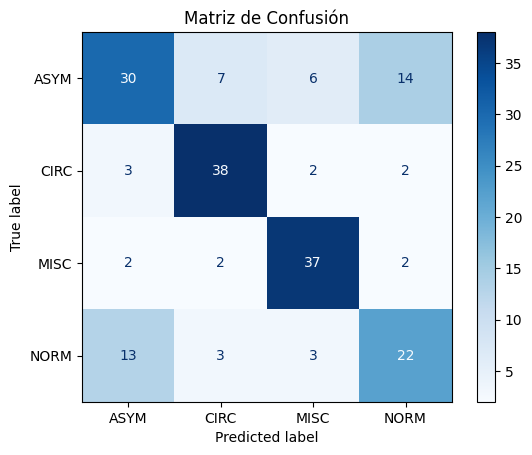

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# 1. Obtener predicciones del modelo (probabilidades)
y_pred_prob = model.predict(X_test)

# 2. Convertir predicciones one-hot a etiquetas numéricas
y_pred = np.argmax(y_pred_prob, axis=1)

# 3. Convertir etiquetas verdaderas one-hot a etiquetas numéricas
y_true = np.argmax(y_test, axis=1)

# 4. Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# 5. Mostrar matriz con etiquetas reales de clases
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión")
plt.show()
